<div class="alert alert-block alert-info"><font size="6"><b>Sprint 11 Task 1 (S11_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Cluster different flights using the K-means algorithm.</SPAN>

We are officially in the land of unsupervised learning where we need to figure out patterns and structures without a set outcome in mind. It’s both challenging and thrilling as a data scientist.

First of all I will import the required libraries in order to start with the task. I will be importing some other libraries as we need them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


I'll be using the dataset from previous Sprints with all the data wrangling that we've already done. This includes: NaN treatment, Feature Engineering, etc.

In [2]:
flight = pd.read_csv('../../9 Sprint/S09 T01 Training and Test Sets/flights_S11T01.csv')
pd.set_option('display.max_columns', 30)

### Descriptive statistical analysis

In [3]:
flight.shape

(1936758, 29)

In [4]:
flight.sample(10, random_state = 7)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
262773,2008,2,10,7,2146,2140,2317,2314,UA,898,N585UA,91,94,72,3,6,IAD,BOS,413,6,13,0,N,0,7,13,26,0,7
612441,2008,4,17,4,1413,1346,1503,1435,YV,7307,N651ML,50,49,26,28,27,ORD,BMI,116,3,21,0,N,0,28,0,0,0,0
589522,2008,4,18,5,1251,1240,1510,1500,WN,387,N520SW,79,80,68,10,11,BNA,JAX,484,3,8,0,N,0,0,0,0,0,45
1160489,2008,7,27,7,2225,1904,202,2244,UA,1568,N494UA,157,160,124,198,201,ORD,TPA,1012,4,29,0,N,0,0,54,0,0,144
1437292,2008,9,18,4,2114,2105,2143,2140,WN,496,N605SW,89,95,76,3,9,AUS,ELP,528,4,9,0,N,0,81,0,2,0,7
129882,2008,1,11,5,948,920,1235,1200,MQ,4836,N731BE,167,160,115,35,28,LGA,SDF,658,5,47,0,N,0,28,0,7,0,0
1714296,2008,11,17,1,958,855,1104,1015,AA,1247,N4XLAA,126,140,106,49,63,RDU,ORD,647,6,14,0,N,0,49,0,0,0,0
1517064,2008,9,14,7,1316,1310,1606,1604,CO,17,N14106,350,354,322,2,6,EWR,LAX,2454,10,18,0,N,0,163,0,1,0,38
1845416,2008,12,26,5,2022,1841,2124,1938,EV,5267,N836AS,122,117,86,106,101,ATL,XNA,589,2,34,0,N,0,6,0,5,0,95
513442,2008,3,20,4,1444,1353,1604,1518,NW,230,N516US,80,85,59,46,51,DTW,DCA,405,5,16,0,N,0,46,0,0,0,0


<u>**Variable descriptions from original dataset:**</u>   

1. **Year:** 2008 
2. **Month:** 1-12 
3. **DayofMonth:** 1-31 
4. **DayOfWeek:** 1 (Monday) - 7 (Sunday) 
5. **DepTime:** actual departure time (local, hhmm) 
6. **CRSDepTime:** scheduled departure time (local, hhmm) 
7. **ArrTime:** actual arrival time (local, hhmm) 
8. **CRSArrTime:** scheduled arrival time (local, hhmm) 
9. **UniqueCarrier:** unique carrier code 
10. **FlightNum:** flight number 
11. **TailNum:** plane tail number 
12. **ActualElapsedTime:** in minutes 
13. **CRSElapsedTime:** in minutes 
14. **AirTime:** in minutes 
15. **ArrDelay:** arrival delay, in minutes 
16. **DepDelay:** departure delay, in minutes 
17. **Origin:** origin IATA airport code 
18. **Dest:** destination IATA airport code 
19. **Distance:** in miles 
20. **TaxiIn:** taxi in time, in minutes 
21. **TaxiOut:** taxi out time in minutes 
22. **Cancelled:** was the flight cancelled? 1 = yes, 0 = no
23. **CancellationCode:** reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
24. **Diverted:** 1 = yes, 0 = no 
25. **CarrierDelay:** in minutes 
26. **WeatherDelay:** in minutes 
27. **NASDelay:** in minutes 
28. **SecurityDelay:** in minutes 
29. **LateAircraftDelay:** in minutes

Source: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7


In [5]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Year               int64 
 1   Month              int64 
 2   DayofMonth         int64 
 3   DayOfWeek          int64 
 4   DepTime            int64 
 5   CRSDepTime         int64 
 6   ArrTime            int64 
 7   CRSArrTime         int64 
 8   UniqueCarrier      object
 9   FlightNum          int64 
 10  TailNum            object
 11  ActualElapsedTime  int64 
 12  CRSElapsedTime     int64 
 13  AirTime            int64 
 14  ArrDelay           int64 
 15  DepDelay           int64 
 16  Origin             object
 17  Dest               object
 18  Distance           int64 
 19  TaxiIn             int64 
 20  TaxiOut            int64 
 21  Cancelled          int64 
 22  CancellationCode   object
 23  Diverted           int64 
 24  CarrierDelay       int64 
 25  WeatherDelay       int64 
 26  NASDelay      

In [6]:
flight.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1936758.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1936758.0,6.111106,3.482546,1.0,3.0,6.0,9.0,12.0
DayofMonth,1936758.0,15.753470,8.776272,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1936758.0,3.984827,1.995966,1.0,2.0,4.0,6.0,7.0
DepTime,1936758.0,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1936758.0,1610.114540,547.824622,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
FlightNum,1936758.0,2184.263236,1944.702250,1.0,610.0,1543.0,3422.0,9742.0
ActualElapsedTime,1936758.0,133.370061,72.056587,14.0,80.0,116.0,165.0,1114.0


In [7]:
flight.isnull().sum().sum()

0

Since we are working with a dataset thas has already been "cleaned" in previous tasks, all features are correctly classified and there are not any NaN's present. 

### Population Sample

In order to solve this practice and be able to rerun code faster, I'm going to take a sample from data and do hypotesys testing to verify that mean of DepDelay is equal in sample and population with 95% a level of confidence.  

In [8]:
popmean = flight.ArrDelay.mean()
x = flight.ArrDelay.sample(1000, random_state = 7)
alpha = 0.005

result = stats.ttest_1samp(x, popmean, alternative='two-sided')
print(f'The two tailed P-value is {round(result[1],3)}')

if result[1] < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The two tailed P-value is 0.1
The null hypothesis cannot be rejected


 We will use flights dataset with a sample of 10.000 observations from now onwards.

In [9]:
flights = flight.sample(10000, random_state = 7).reset_index(drop = True) # we use flights dataset from now onwards

### Feature Selection & Engineering

We need to select the features that will be used for modeling with criteria. I ran several test with different features selection to compare results. Using categorical variables like **UniqueCarrier**, **Origin**, or **Dest** gives us a high dimensionality issue that can't be adressed with PCA, we go from 600 columns to 500.  Also silhouette score is pretty low. In this case we can't use target encoder as we don't have a target in mind for unsupervised learning.

*An efficient way of handling it is by selecting a subset of important features. It helps in finding clusters efficiently, understanding the data better and reducing data size for efficient storage, collection and processing. The task of finding original important features for unsupervised data is largely untouched...*


In [10]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [11]:
flights.Cancelled.value_counts(), flights.Diverted.value_counts(), 

(0    10000
 Name: Cancelled, dtype: int64,
 0    9960
 1      40
 Name: Diverted, dtype: int64)

**Cancelled** and **Diverted** columns dont't have much information as they have 0 in almost all cells.

In [12]:
selected_features = ['ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 
                     'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'LateAircraftDelay']

flights = flights[selected_features]

flights

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
0,91,94,72,3,6,413,6,13,7,13,26,7
1,50,49,26,28,27,116,3,21,28,0,0,0
2,79,80,68,10,11,484,3,8,0,0,0,45
3,157,160,124,198,201,1012,4,29,0,54,0,144
4,89,95,76,3,9,528,4,9,81,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,65,73,38,97,105,94,5,22,97,0,0,0
9996,104,94,80,36,26,403,11,13,26,0,10,0
9997,142,131,115,36,25,701,8,19,0,0,11,25
9998,90,96,58,12,18,321,7,25,17,0,0,0


The selection of fetures for modeling was made considering variables that are expressed in minutes and directly affect the possible delay of a flight.

**Scaling data**

In [13]:
flights_ss = pd.DataFrame(StandardScaler().fit_transform(flights), columns = flights.columns)

**Principal Component Analysis**

In order to plot data we are keeping 3 PCA columns:

In [14]:
pca = PCA(n_components = 3) 
x = pca.fit_transform(flights_ss)
flights_pca = pd.DataFrame(data = x, columns = ['PCA1', 'PCA2', 'PCA3'])
flights_pca

,PCA1,PCA2,PCA3
0,-1.182018,-0.802179,-0.524003
1,-2.394812,-0.433758,-0.122308
2,-1.481328,-0.918137,0.621671
3,0.808312,4.264641,1.522742
4,-1.180348,-0.697772,0.802849
...,...,...,...
9995,-1.950902,1.573010,0.573236
9996,-0.977136,-0.315419,-0.294722
9997,0.051748,-0.403522,-0.240721
9998,-1.298628,-0.703669,-0.483245


In [15]:
pca_expl = pca.explained_variance_ratio_.round(3) # how much variance exlains each PCA column
pca_expl, sum(pca_expl)

(array([0.332, 0.216, 0.116]), 0.664)

The explained variance with the feature we chose and with only 3 PCA columns it's not great but it isn't bad either.

### Optimal number of clusters for K-Means

**Inertia and elbow method**

In [16]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 7}

# SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(flights_pca)
    sse.append(kmeans.inertia_)

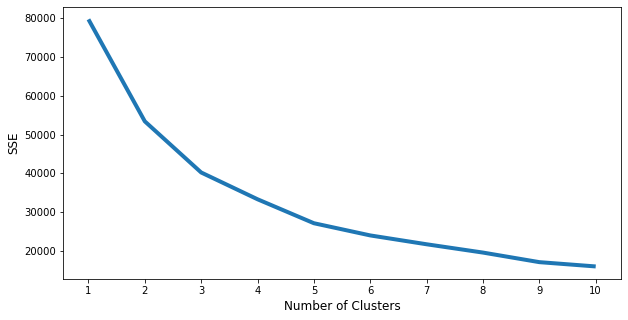

In [17]:
fig, ax = plt.subplots(figsize = (10,5))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters",fontsize = 12)
plt.ylabel("SSE",fontsize = 12)
plt.rcParams["font.size"] = "10"
plt.show()

In [18]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(f'Number of Clusters: {kl.elbow}')

Number of Clusters: 3


According to the elbow method we should be dividing data into 3 clusters.

**Silhouette method**

In [19]:
# Silhouette values for each k
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(flights_pca)
    score = silhouette_score(flights_pca, kmeans.labels_)
    silhouette_coefficients.append(score)

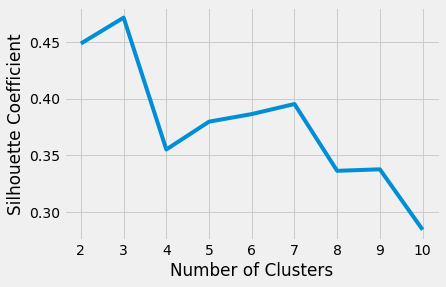

In [20]:
#plot the average silhouette
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

According to the silhouette method we should be dividing data into 3 clusters.

### K-Means algorithm

In [21]:
# n_clusters is 3
kmeans = KMeans(n_clusters = 3, **kmeans_kwargs)
kmeans.fit(flights_pca)

KMeans(init='random', n_clusters=3, random_state=7)

In [22]:
flights_pca['kmeans_clusters'] = kmeans.labels_
flights_pca

,PCA1,PCA2,PCA3,kmeans_clusters
0,-1.182018,-0.802179,-0.524003,0
1,-2.394812,-0.433758,-0.122308,0
2,-1.481328,-0.918137,0.621671,0
3,0.808312,4.264641,1.522742,2
4,-1.180348,-0.697772,0.802849,0
...,...,...,...,...
9995,-1.950902,1.573010,0.573236,0
9996,-0.977136,-0.315419,-0.294722,0
9997,0.051748,-0.403522,-0.240721,0
9998,-1.298628,-0.703669,-0.483245,0


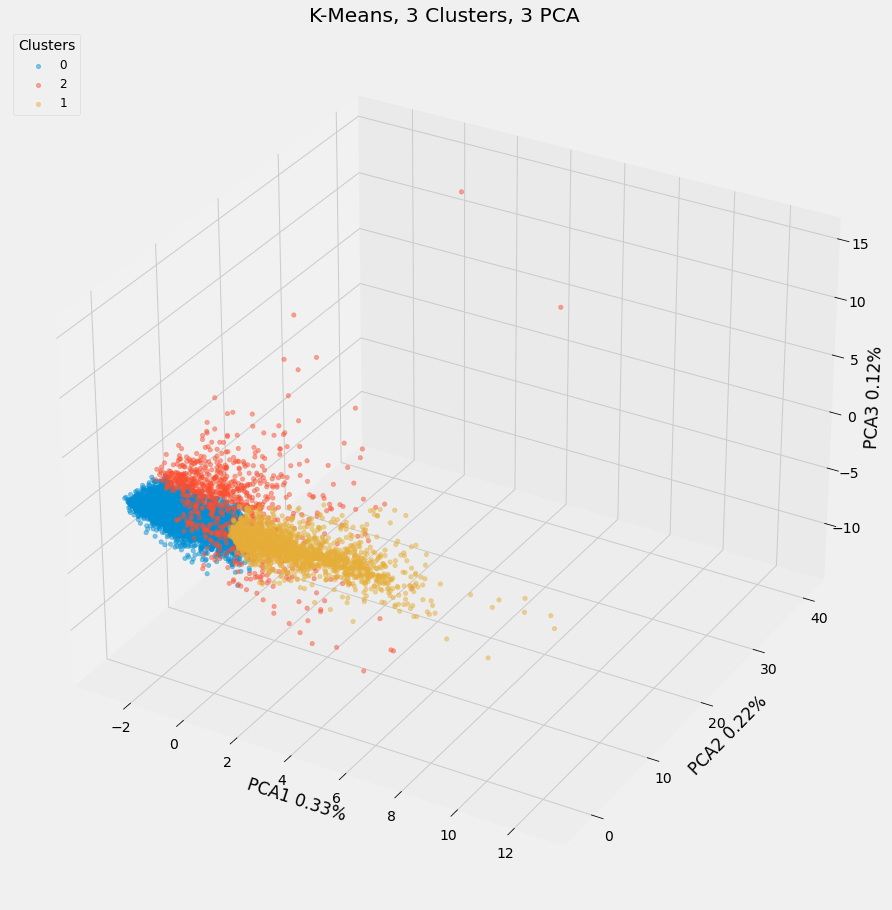

In [23]:
# 3 dimensional plot
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection = '3d')

for s in flights_pca['kmeans_clusters'].unique():
    ax.scatter(flights_pca['PCA1'][flights_pca['kmeans_clusters'] == s], flights_pca['PCA2'][flights_pca['kmeans_clusters'] == s], 
                   flights_pca['PCA3'][flights_pca['kmeans_clusters'] == s], label = s, alpha = 0.5)

ax.set_xlabel('PCA1 ' + str(round(pca.explained_variance_ratio_[0], 2)) + '%')
ax.set_ylabel('PCA2 ' + str(round(pca.explained_variance_ratio_[1], 2)) + '%')
ax.set_zlabel('PCA3 ' + str(round(pca.explained_variance_ratio_[2], 2)) + '%')
ax.set_title('K-Means, 3 Clusters, 3 PCA')
plt.legend(title = "Clusters", fontsize = 12, bbox_to_anchor = (0.09, 1))
plt.show()

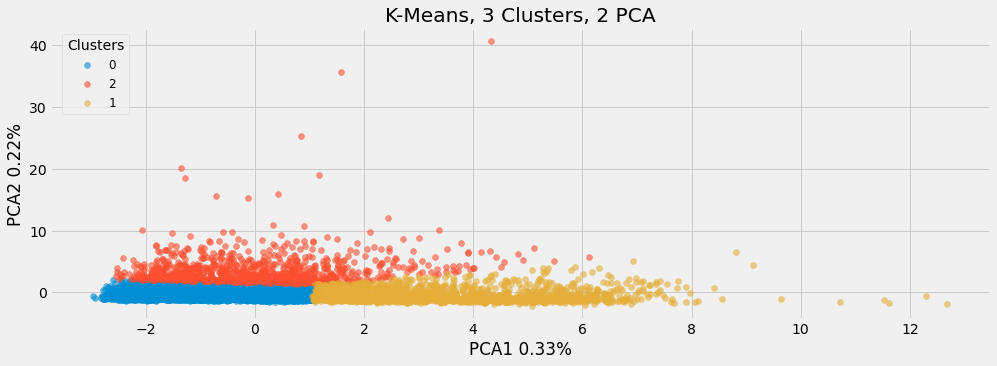

In [24]:
# plot 2 dimensional
fig, ax = plt.subplots(figsize = (15,5))

for s in flights_pca['kmeans_clusters'].unique():
    ax.scatter(flights_pca['PCA1'][flights_pca['kmeans_clusters'] == s], 
                   flights_pca['PCA2'][flights_pca['kmeans_clusters'] == s], 
                                      label = s, alpha=0.6)

ax.set_xlabel('PCA1 ' + str(round(pca.explained_variance_ratio_[0], 2)) + '%')
ax.set_ylabel('PCA2 ' + str(round(pca.explained_variance_ratio_[1], 2)) + '%')
ax.set_title('K-Means, 3 Clusters, 2 PCA')
plt.legend(title = "Clusters", fontsize = 12, bbox_to_anchor = (0.09, 1))
plt.show()

In this case clusters are not distant from each other. However the algorithm did separate them in three well defined regions without superposition.

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Cluster the different flights using the hierarchical clustering algorithm.</SPAN>

### Hierarchical clustering algorithm

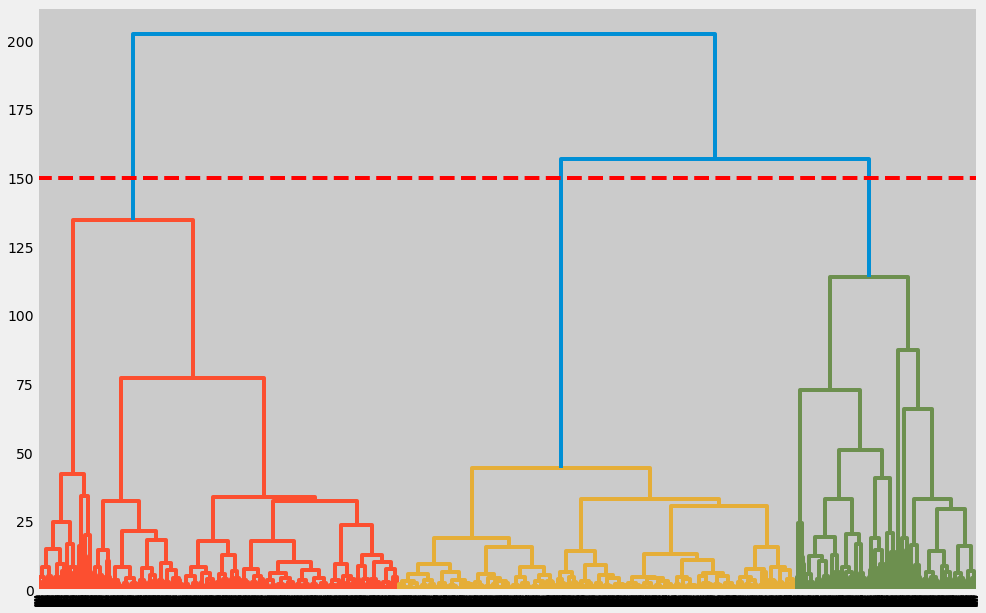

In [25]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,10))
dendrogram = sch.dendrogram(sch.linkage(flights_pca[['PCA1', 'PCA2', 'PCA3']], method='ward'))
plt.axhline(y = 150 , color = 'r', linestyle = '--'); 
plt.rcParams["font.size"] = "8"
plt.show()

We have 3 clusters according to this dendrogram and 150 distance threshold as it cuts 3 lines. Also total number of colors is 4 (blue, red, yellow and blue) and if we subtract 1, gives us optimal number of clusters which is 3.

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(flights_pca[['PCA1', 'PCA2', 'PCA3']])

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [27]:
flights_pca['hiarch_cluster'] = cluster.labels_
flights_pca

,PCA1,PCA2,PCA3,kmeans_clusters,hiarch_cluster
0,-1.182018,-0.802179,-0.524003,0,2
1,-2.394812,-0.433758,-0.122308,0,2
2,-1.481328,-0.918137,0.621671,0,2
3,0.808312,4.264641,1.522742,2,1
4,-1.180348,-0.697772,0.802849,0,2
...,...,...,...,...,...
9995,-1.950902,1.573010,0.573236,0,1
9996,-0.977136,-0.315419,-0.294722,0,1
9997,0.051748,-0.403522,-0.240721,0,0
9998,-1.298628,-0.703669,-0.483245,0,2


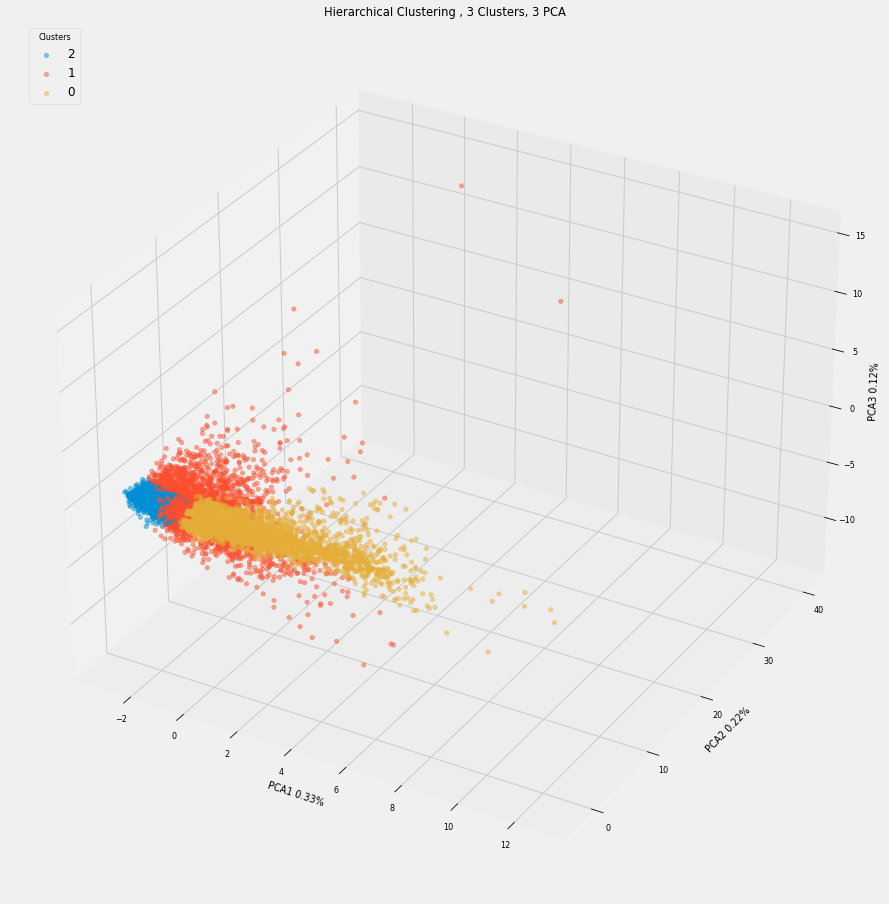

In [28]:
# plot 3 dimensional
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')

for c in flights_pca.hiarch_cluster.unique():
    ax.scatter(flights_pca['PCA1'][flights_pca.hiarch_cluster == c], flights_pca['PCA2'][flights_pca.hiarch_cluster == c], 
                   flights_pca['PCA3'][flights_pca.hiarch_cluster == c], label = c, alpha=0.5)

ax.set_xlabel('PCA1 ' + str(round(pca.explained_variance_ratio_[0], 2)) + '%')
ax.set_ylabel('PCA2 ' + str(round(pca.explained_variance_ratio_[1], 2)) + '%')
ax.set_zlabel('PCA3 ' + str(round(pca.explained_variance_ratio_[2], 2)) + '%')
ax.set_title('Hierarchical Clustering , 3 Clusters, 3 PCA')
plt.legend(title = "Clusters", fontsize = 12, bbox_to_anchor = (0.09, 1))
plt.show()

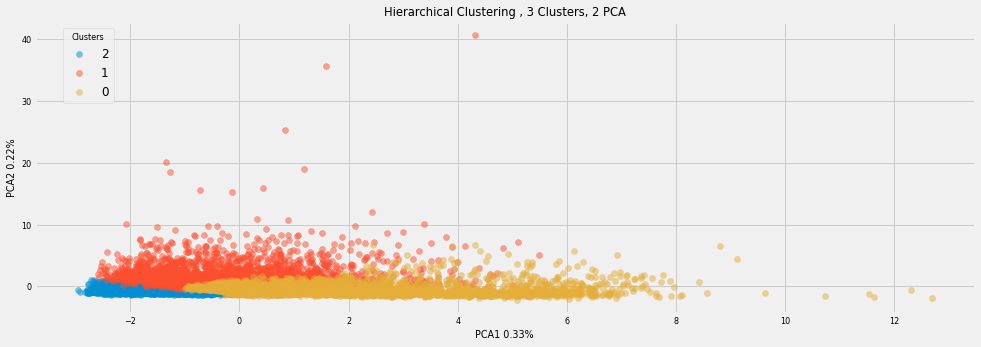

In [29]:
# plot 2 dimensional
fig, ax = plt.subplots(figsize = (15,5))

for c in flights_pca.hiarch_cluster.unique():
    ax.scatter(flights_pca['PCA1'][flights_pca.hiarch_cluster == c], flights_pca['PCA2'][flights_pca.hiarch_cluster == c], 
                                      label = c, alpha = 0.5)

ax.set_xlabel('PCA1 ' + str(round(pca.explained_variance_ratio_[0], 2)) + '%')
ax.set_ylabel('PCA2 ' + str(round(pca.explained_variance_ratio_[1], 2)) + '%')
ax.set_title('Hierarchical Clustering , 3 Clusters, 2 PCA')
plt.legend(title = "Clusters", fontsize = 12, bbox_to_anchor = (0.09, 1))
plt.show()

Clusters geometry are similar to K-Means but with more superposition as we can see in the scatterplots.

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Calculate clustering performance using a parameter such as silhouette.</SPAN>

### Models performance: Silhouette score

In [30]:
#calculate silhouette
k_silhouette = silhouette_score(flights_pca[['PCA1', 'PCA2', 'PCA3']], flights_pca['kmeans_clusters']).round(3)
print('K-Means score:', k_silhouette)

K-Means score: 0.472


In [31]:
# Hirearchical Clustering Silhouette
hc_silhouette = silhouette_score(flights_pca[['PCA1', 'PCA2', 'PCA3']], flights_pca.hiarch_cluster).round(3)
print('Hirearchical Clustering score:', hc_silhouette)

Hirearchical Clustering score: 0.316


K-Means algorithm scores better in this case so we would use this model for clustering. 